In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from scipy.stats.mstats import pearsonr, spearmanr

In [2]:
subset = False
fol = '/Users/irffanalahi/Research/Research_update/SoftRD/largerEXP/genepromdelta.7/Randomforest/developing/onPBMC/corr/testAaronctprop/fixed_gt/CD8_combined/perct_corr/RF_ctprop2_forrenametest'

files = os.listdir(fol)

if '.ipynb_checkpoints' in files:
    files.remove('.ipynb_checkpoints')

if '.DS_Store' in files:
    files.remove('.DS_Store')

In [3]:
dfs = []
for i, file in enumerate(files):
    data = pd.read_csv(fol + '/' + file, sep='\t', index_col=0)
    df = pd.DataFrame(data)
    dfs.append(df.copy())
    
for i, df in enumerate(dfs):
    cols = []
    for cell in list(df.columns):
        if '.x' in cell:
            cols.append(cell.split('.')[0])
        elif '.y' in cell:
            cols.append(cell.split('.')[0] + '_real')
        else:
            cols.append(cell)
    df.columns = cols

for i, df in enumerate(dfs): 
    if i == 0:
        samples = list(df.index)
        columns = list(df.columns)
    else:
        new_samples = list(df.index)
        new_columns = list(df.columns)
        samples = list(set(new_samples).intersection(samples))
        columns = list(set(new_columns + columns))
    columns = list(set(columns))


new_columns = []
for col in columns:
    if '_real' in col:
        new_columns.append(col.split('_')[0])
        
columns = new_columns
print(columns)

['CD8', 'NK', 'Mn', 'CD4', 'm4', 'Tr', 'DC', 'mB', 'nB']


In [4]:
def generate_df_dic(correlation, dfs, columns):
    df_corr = {}
    for i, df in enumerate(dfs):
        if subset:
            df = df.loc[samples, :]
        for cell in columns:
            if cell in df.columns:
                if cell not in df_corr:
                    df_corr[cell] = []
                corr = correlation(list(df[cell]), list(df[cell + '_real']))[0]
                df_corr[cell].append(corr)
            else:
                df_corr[cell].append(float('NaN'))
    return df_corr

In [5]:
df_pearson_dic = generate_df_dic(pearsonr, dfs, columns)
df_spearman_dic = generate_df_dic(spearmanr, dfs, columns)

In [6]:
df_pearson = pd.DataFrame.from_dict(df_pearson_dic, orient='index', columns = files)
df_spearman = pd.DataFrame.from_dict(df_spearman_dic, orient='index', columns = files)
display(df_pearson)



,BL14_genepromSM_0.7.txtPBMC_bestref.txt_result_dupindex_binnedstats.pkl_totalformatteddata.pkl_RFprob10000treesAaronCTprop_CSxOut.txt_cytof_fixed_totalCD8fromgt.txt,BL14_genepromSM_0.7.txtPBMC_bestref.txt_result_dupindex_binnedstats.pkl_totalformatteddata.pkl_RFprob10000treesAaronCTprop_CSxOut.txt_7pbmc_firstflowv2_7samples_totalcd8fromgt.txt,BL14_genepromSM_0.7.txtPBMC_bestref.txt_result_dupindex_binnedstats.pkl_totalformatteddata.pkl_RFprob10000treesAaronCTprop_CSxOut.txt_7PBMC_cytofv2_totalcd8fromgt.txt,BL14_genepromSM_0.7.txtPBMC_bestref.txt_result_dupindex_binnedstats.pkl_totalformatteddata.pkl_RFprob10000treesAaronCTprop_CSxOut.txt_1stflow_7samples_fixedtotalCD8fromgt.txt
CD8,0.885825,0.932940,0.885825,0.832610
NK,0.784739,0.796537,0.784739,0.796537
Mn,0.408921,0.870557,0.408921,0.870557
CD4,0.633933,0.632837,0.673395,0.493740
m4,0.644447,0.393142,0.638828,0.373582
Tr,0.791768,0.938195,-0.217363,0.853311
DC,-0.422365,0.493566,-0.162217,0.493566
mB,0.683427,0.552505,0.683427,0.552505
nB,-0.091330,0.689279,-0.091330,0.689279


In [7]:
df_pearson.rename(index={"CD4": "Naive CD4", "CD8": "Naive CD8","mB":"Memory B cell",'Mn':'Mono','CD14':'Mono','CD19':'B Cell','nB':'Naive B cell','PC':'Palsma','cm8':'CD8 central memory','em8':'CD8 effector memory','m8':'CD8 memory','ed8':'CD8 effector','cm4':'CD4 central memory','em4':'CD4 effector memory','m4':'CD4 memory','mNeu':'PMN','Eo':'Eosinophil','Tr':'Tregs','Mg':'Megakaryocyte'},inplace=True)
display(df_pearson)

,BL14_genepromSM_0.7.txtPBMC_bestref.txt_result_dupindex_binnedstats.pkl_totalformatteddata.pkl_RFprob10000treesAaronCTprop_CSxOut.txt_cytof_fixed_totalCD8fromgt.txt,BL14_genepromSM_0.7.txtPBMC_bestref.txt_result_dupindex_binnedstats.pkl_totalformatteddata.pkl_RFprob10000treesAaronCTprop_CSxOut.txt_7pbmc_firstflowv2_7samples_totalcd8fromgt.txt,BL14_genepromSM_0.7.txtPBMC_bestref.txt_result_dupindex_binnedstats.pkl_totalformatteddata.pkl_RFprob10000treesAaronCTprop_CSxOut.txt_7PBMC_cytofv2_totalcd8fromgt.txt,BL14_genepromSM_0.7.txtPBMC_bestref.txt_result_dupindex_binnedstats.pkl_totalformatteddata.pkl_RFprob10000treesAaronCTprop_CSxOut.txt_1stflow_7samples_fixedtotalCD8fromgt.txt
Naive CD8,0.885825,0.932940,0.885825,0.832610
NK,0.784739,0.796537,0.784739,0.796537
Mono,0.408921,0.870557,0.408921,0.870557
Naive CD4,0.633933,0.632837,0.673395,0.493740
CD4 memory,0.644447,0.393142,0.638828,0.373582
Tregs,0.791768,0.938195,-0.217363,0.853311
DC,-0.422365,0.493566,-0.162217,0.493566
Memory B cell,0.683427,0.552505,0.683427,0.552505
Naive B cell,-0.091330,0.689279,-0.091330,0.689279


In [8]:
df_spearman.rename(index={"CD4": "Naive CD4", "CD8": "Naive CD8","mB":"Memory B cell",'Mn':'Mono','CD14':'Mono','CD19':'B Cell','nB':'Naive B cell','PC':'Palsma','cm8':'CD8 central memory','em8':'CD8 effector memory','m8':'CD8 memory','ed8':'CD8 effector','cm4':'CD4 central memory','em4':'CD4 effector memory','m4':'CD4 memory','mNeu':'PMN','Eo':'Eosinophil','Tr':'Tregs','Mg':'Megakaryocyte'},inplace=True)
df_spearman.head()

,BL14_genepromSM_0.7.txtPBMC_bestref.txt_result_dupindex_binnedstats.pkl_totalformatteddata.pkl_RFprob10000treesAaronCTprop_CSxOut.txt_cytof_fixed_totalCD8fromgt.txt,BL14_genepromSM_0.7.txtPBMC_bestref.txt_result_dupindex_binnedstats.pkl_totalformatteddata.pkl_RFprob10000treesAaronCTprop_CSxOut.txt_7pbmc_firstflowv2_7samples_totalcd8fromgt.txt,BL14_genepromSM_0.7.txtPBMC_bestref.txt_result_dupindex_binnedstats.pkl_totalformatteddata.pkl_RFprob10000treesAaronCTprop_CSxOut.txt_7PBMC_cytofv2_totalcd8fromgt.txt,BL14_genepromSM_0.7.txtPBMC_bestref.txt_result_dupindex_binnedstats.pkl_totalformatteddata.pkl_RFprob10000treesAaronCTprop_CSxOut.txt_1stflow_7samples_fixedtotalCD8fromgt.txt
Naive CD8,0.785714,0.928571,0.785714,0.954994
NK,0.571429,0.607143,0.571429,0.607143
Mono,0.285714,0.642857,0.285714,0.642857
Naive CD4,0.250000,0.214286,0.250000,-0.071429
CD4 memory,0.821429,0.821429,0.857143,0.321429


In [9]:
df_pearson.to_csv(fol + '_pearson_correlation.txt', sep='\t')
df_spearman.to_csv(fol + '_spearman_correlation.txt', sep='\t')

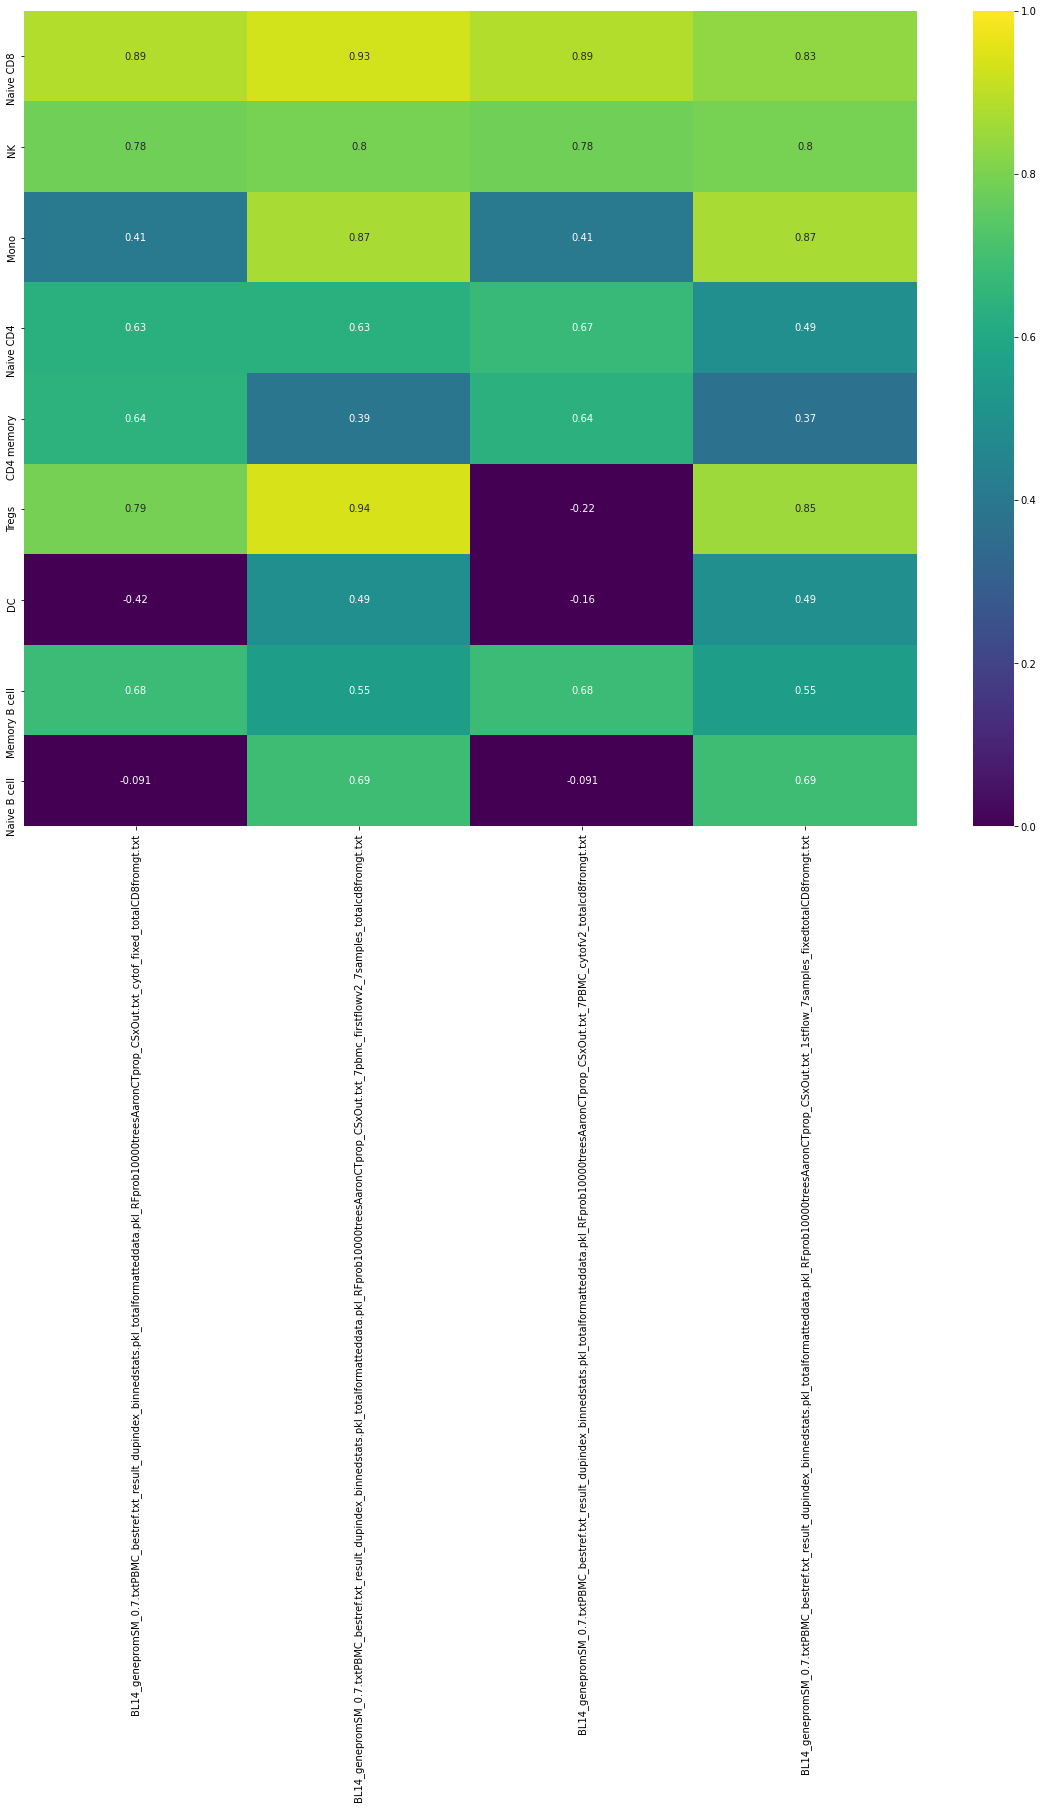

In [10]:
plt.figure(figsize=(20,15))
pearson_heatmap = sns.heatmap(df_pearson, cmap='viridis', annot=True, vmin=0.0, vmax=1.0)
pearson_heatmap.set_facecolor('gray')
plt.savefig(fol + '_pearson_heatmap.pdf', bbox_inches='tight')

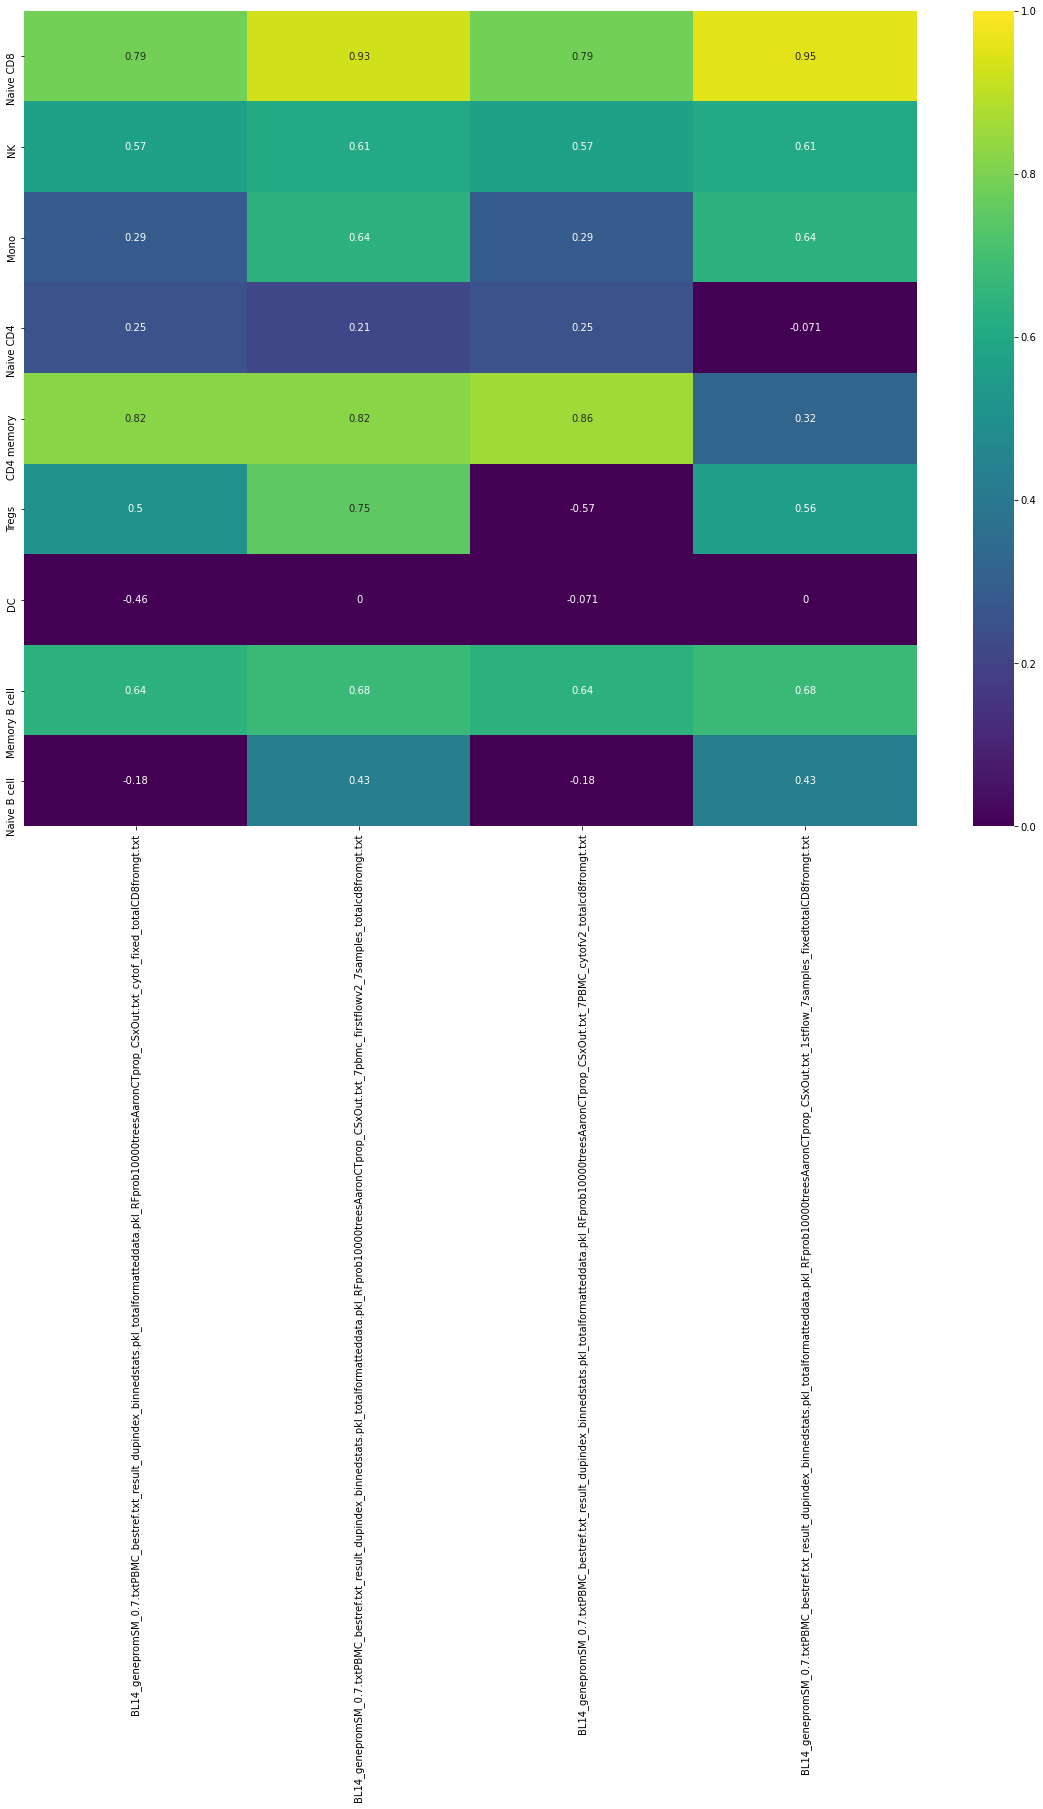

In [11]:
plt.figure(figsize=(20,15))
spearman_heatmap = sns.heatmap(df_spearman, cmap='viridis', annot=True, vmin=0.0, vmax=1.0)
spearman_heatmap.set_facecolor('gray')
plt.savefig(fol + '_spearman_heatmap.pdf', bbox_inches='tight')